# Homework 1
È stato richiesto di produrre un notebook Jupyter dove, per ogni dataset:
1. Si cercano le prime quattro coppie di feature correlate
2. Si crea il grafico per ognuno di queste coppie.
3. Si elabori la PCA e la SVD del dataset, si salvino dunque i risultati su disco.

I dataset offerti sono:
- Diabetes
- Wine recognition
- Breast cancer

Si procederà ad una analisi affrontata più in dettaglio per il dataset **Wine recognition**, successivamente per i restanti due dataset.



# Wine recognition

E' stato scelto il dataset sui vini, il dataset è già presente all'interno della libreria `scikit-learn`:

In [55]:
from sklearn.datasets import load_wine
wine_data = load_wine( as_frame=True )
df = wine_data.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Correlazione
È stato chiesto di trovare le top 4 coppie di feature, usando tre distinti metodi di correlazione:
- Pearson
- Spearman
- Kendall

## Correlator
È stata progettata a tale scopo la classe `Correlator`, che si occupa di creare le combinazioni di coppie di features, e fornire il contesto per eseguire una funzione di correlazione tramite il metodo `run`, che prende come input una funzione `CorrelatorFn`, la quale implementa il metodo di correlazione.

In [56]:
from src.correlator import Correlator, pearson_fn, spearman_fn, kendall_fn
correlator = Correlator(df)

# I risultati, dizionari di (coppia di feature -> correlazione)
pearson_pairs = correlator.run(pearson_fn)
spearman_pairs = correlator.run(spearman_fn)
kendall_pairs = correlator.run(kendall_fn)

`Correlator` inoltre implementa il metodo `merge_correlation_results` che, come il nome intende, fonde in un unico dataset i risultati ottenuti:

In [57]:
merged_df = correlator.merge_correlation_results(
  Pearson = pearson_pairs,
  Spearman = spearman_pairs,
  Kendall = kendall_pairs
)
merged_df

,Pearson,Spearman,Kendall
Features,,,
"(alcohol, malic_acid)",0.094397,0.140430,0.093844
"(alcohol, ash)",0.211545,0.243722,0.170154
"(alcohol, alcalinity_of_ash)",-0.310235,-0.306598,-0.212978
"(alcohol, magnesium)",0.270798,0.365503,0.250506
"(alcohol, total_phenols)",0.289101,0.310920,0.209099
...,...,...,...
"(color_intensity, od280/od315_of_diluted_wines)",-0.428815,-0.317516,-0.206046
"(color_intensity, proline)",0.316100,0.457096,0.316632
"(hue, od280/od315_of_diluted_wines)",0.565468,0.485454,0.324678


## Risultati
Vengono selezionati i top 4 per ogni correlazione, di seguito fusi in un unico DataFrame e ordinati per media.

In [58]:
import pandas as pd
from src.utils import select_sort_n


top_merged_df = select_sort_n(merged_df, ["Pearson"],4) 
top_merged_df

,Pearson,Spearman,Kendall,Mean
Features,,,,
"(total_phenols, flavanoids)",0.864564,0.879404,0.701999,0.815322
"(flavanoids, od280/od315_of_diluted_wines)",0.787194,0.741533,0.520448,0.683058
"(flavanoids, proanthocyanins)",0.652692,0.730322,0.534615,0.639209
"(total_phenols, od280/od315_of_diluted_wines)",0.699949,0.687207,0.478267,0.621808


Si nota che, per ogni metodo di correlazione, sono stati scelti le prime 4 coppie di feature con valore più alto, successivamente sono stati fusi i risultati, il dataframe risultato ha comunque quattro coppie di features, almeno in questo caso.  

Di seguito, i grafici delle coppie di features:

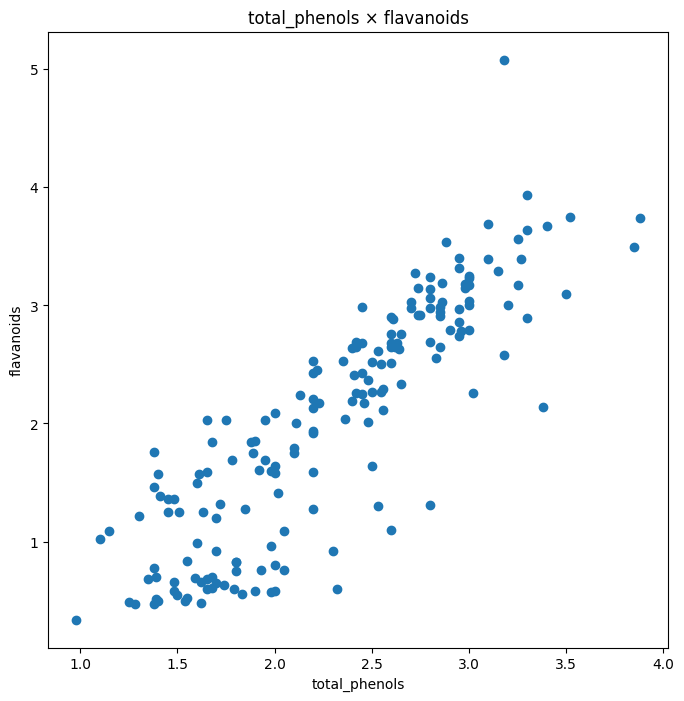

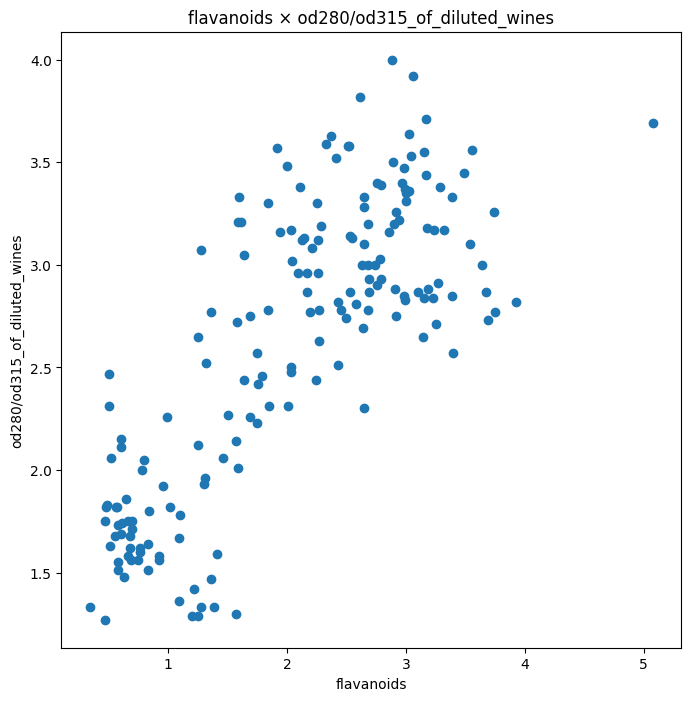

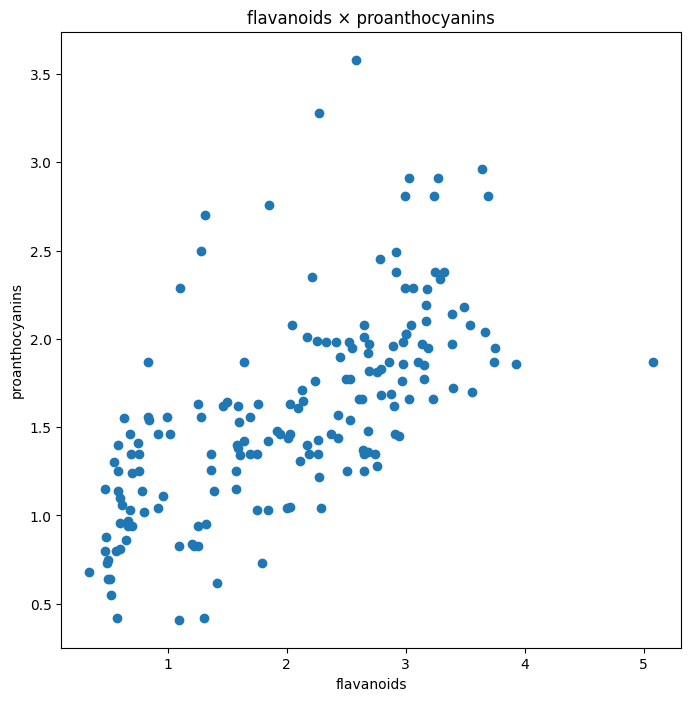

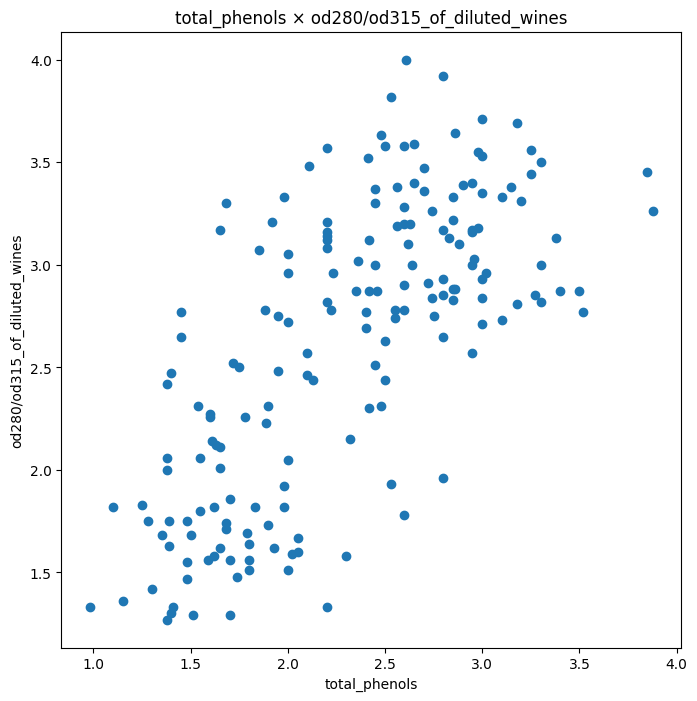

In [59]:
from src.utils import plot_feature_pairs_from_merged_set
plot_feature_pairs_from_merged_set(df, top_merged_df)

## Principal Component Analysis e Single Value Decomposition
È richiesto di elaborare PCA e SVD sul dataset.
### Elaborazione della PCA
La Principal Component Analysis (PCA) è una tecnica di riduzione della dimensione.
La funzione `compute_pca` si occupa di standardizzare il dataset ed elaborare il risultato della **PCA** usando gli strumenti offerti da **scikit-learn**.

In [60]:
from src.reduction import compute_pca
pca_df = compute_pca(df, n = 3)
pca_df

,principal component 0,principal component 1,principal component 2
0,318.562979,21.492131,-3.130735
1,303.097420,-5.364718,-6.822835
2,438.061133,-6.537309,1.113223
3,733.240139,0.192729,0.917257
4,-11.571428,18.489995,0.554422
...,...,...,...
173,-6.980211,-4.541137,2.474707
174,3.131605,2.335191,4.309931
175,88.458074,18.776285,2.237577
176,93.456242,18.670819,1.788392


### Elaborazione della SVD
La Singular Value Decomposition è una tecnica che consiste nel decomporre una matrice originale come prodotto di matrici, sfruttando su autovettori e autovalori.

Ancora una volta, si fa uso di una funzione, `compute_svd`, che si occupa di standardizzare - se richiesto - il dataset, e successivamente applicare la implementazione di **TruncatedSVD** di **SciPy**.

In [61]:
from src.reduction import compute_svd
svd_df = compute_svd(df, n=3, std = True)

svd_df

,component 0,component 1,component 2
0,3.316751,1.443463,-0.165739
1,2.209465,-0.333393,-2.026457
2,2.516740,1.031151,0.982819
3,3.757066,2.756372,-0.176192
4,1.008908,0.869831,2.026688
...,...,...,...
173,-3.370524,2.216289,-0.342570
174,-2.601956,1.757229,0.207581
175,-2.677839,2.760899,-0.940942
176,-2.387017,2.297347,-0.550696


### Salvataggio su disco
Di seguito, il codice che salva su disco

In [62]:
import os
out_file = os.path.abspath('') + '/out/{name}.csv'
pca_df.to_csv(out_file.format(name="wine_pca"))
svd_df.to_csv(out_file.format(name="wine_svd"))

# Diabetes
Si carica il dataset Diabetes:

In [63]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes( as_frame=True )
df = diabetes_data.data
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## Correlazione
Di seguito si calcola la correlazione con i metodi:
- Pearson
- Spearman
- Kendal
 
Quindi si selezionano i primi 4 risultati, ordinati per media orizzontale ( media delle correlazioni ):

In [64]:
correlator = Correlator(df)

pearson_pairs = correlator.run(pearson_fn)
spearman_pairs = correlator.run(spearman_fn)
kendall_pairs = correlator.run(kendall_fn)

merged_df = correlator.merge_correlation_results(
  Pearson = pearson_pairs,
  Spearman = spearman_pairs,
  Kendall = kendall_pairs
)

top_merged_df = select_sort_n(merged_df, ['Pearson','Spearman', 'Kendall'], 4)
top_merged_df

,Pearson,Spearman,Kendall,Mean
Features,,,,
"(s1, s2)",0.896663,0.878793,0.717229,0.830895
"(s2, s4)",0.659817,0.652283,0.503579,0.605226
"(s4, s5)",0.617859,0.640390,0.485410,0.581220
"(s1, s4)",0.542207,0.520674,0.393367,0.485416


Si graficano le coppie di features:

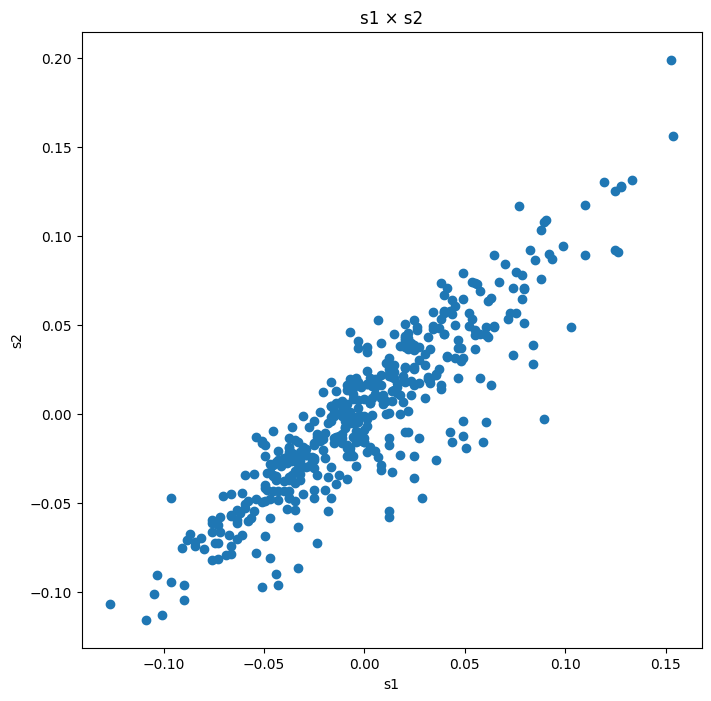

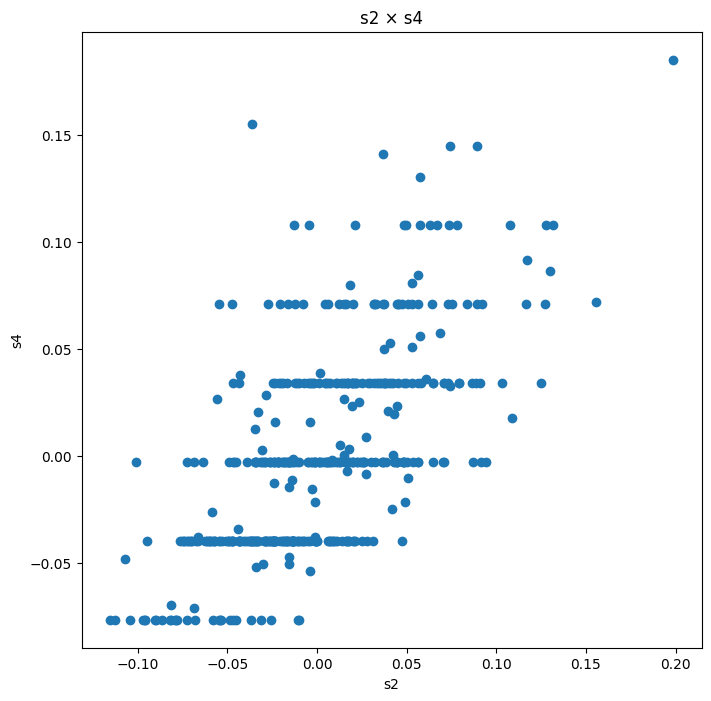

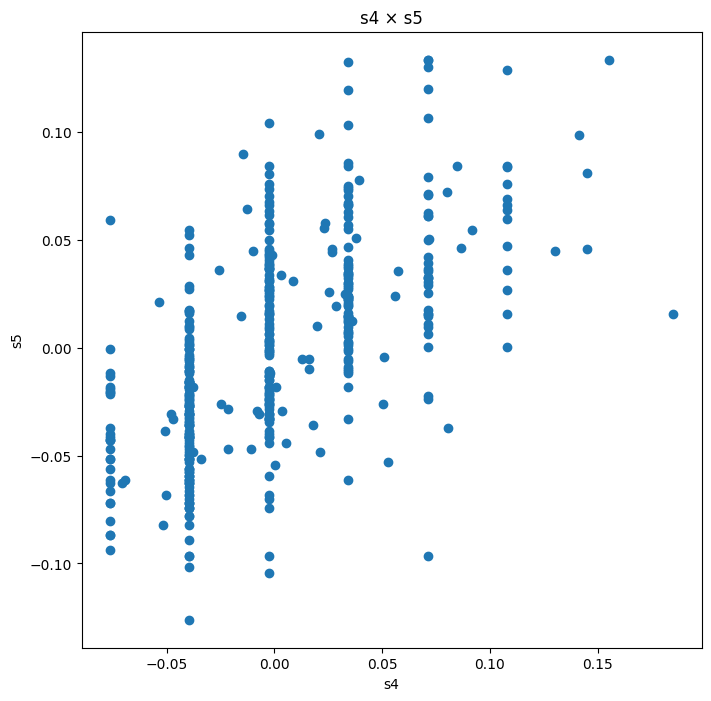

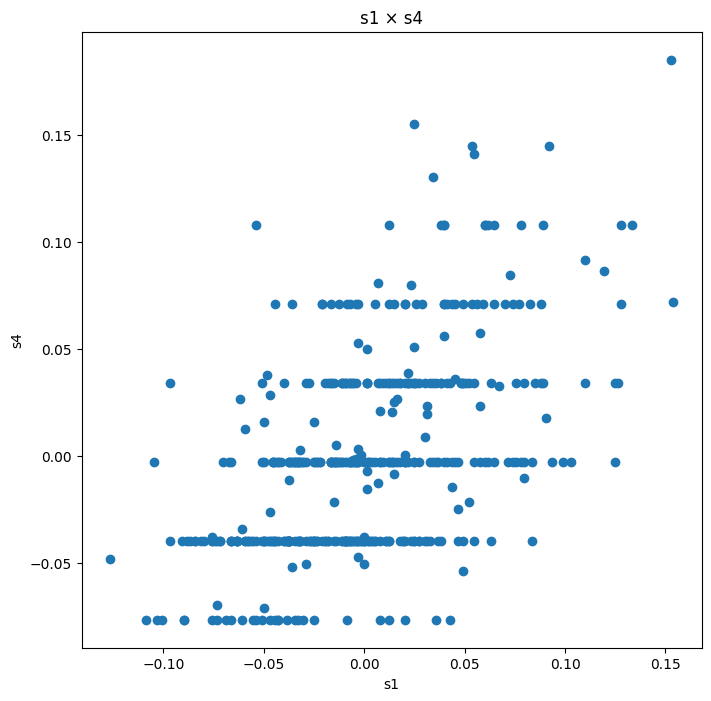

In [65]:
plot_feature_pairs_from_merged_set(df, top_merged_df)

## PCA e SVD
Si procede con il calcolo di PCA e SVD, come fatto in precedenza, ed infine si salva il risultato su disco:

In [66]:
pca_df = compute_pca(df, n = 3)
svd_df = compute_svd(df, n = 3, std = True)
pca_df.to_csv(out_file.format(name="diabetes_pca"))
svd_df.to_csv(out_file.format(name="diabetes_svd"))

# Breast cancer
Si carica il dataset Breast cancer:

In [67]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer( as_frame=True )
df = breast_cancer_data.data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Correlazione
Di seguito si calcola la correlazione con i metodi:
- Pearson
- Spearman
- Kendal
 
Quindi si selezionano i primi 4 risultati, ordinati per media orizzontale ( media delle correlazioni ):

In [68]:
correlator = Correlator(df)

pearson_pairs = correlator.run(pearson_fn)
spearman_pairs = correlator.run(spearman_fn)
kendall_pairs = correlator.run(kendall_fn)

merged_df = correlator.merge_correlation_results(
  Pearson = pearson_pairs,
  Spearman = spearman_pairs,
  Kendall = kendall_pairs
)

top_merged_df = select_sort_n(merged_df, ['Pearson','Spearman', 'Kendall'], 4)
top_merged_df

,Pearson,Spearman,Kendall,Mean
Features,,,,
"(mean radius, mean area)",0.987357,0.999602,0.985565,0.990841
"(worst radius, worst area)",0.984015,0.998891,0.979299,0.987401
"(mean radius, mean perimeter)",0.997855,0.997802,0.963320,0.986326
"(mean perimeter, mean area)",0.986507,0.997068,0.956965,0.980180
"(worst radius, worst perimeter)",0.993708,0.993548,0.939026,0.975427


Si graficano le coppie di features:

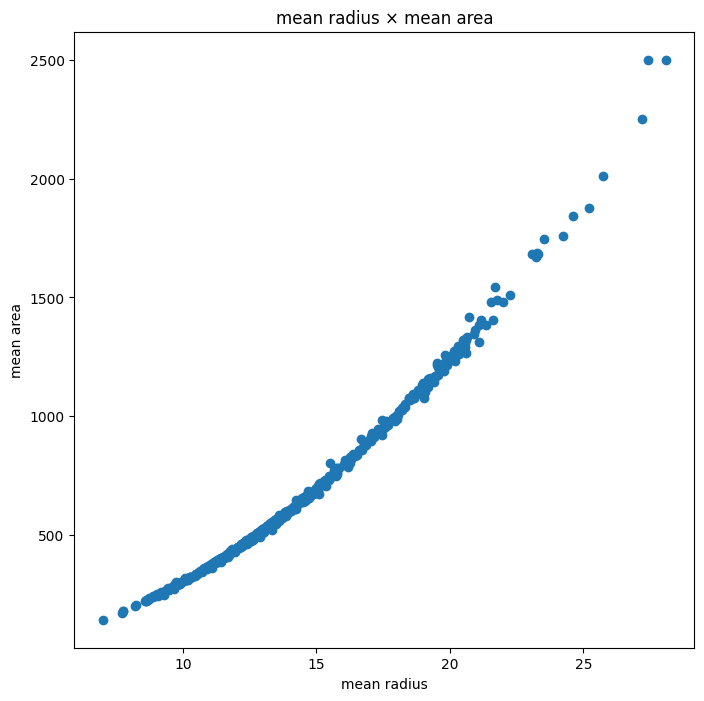

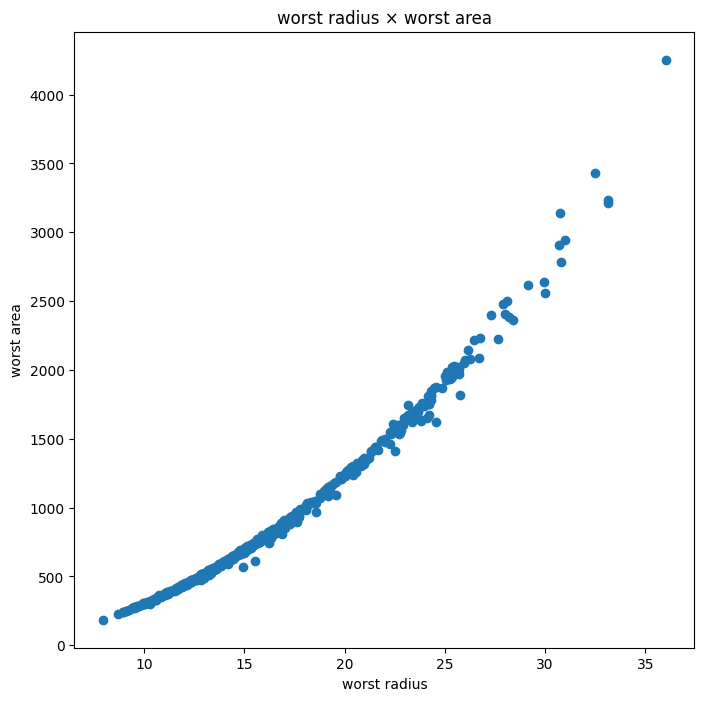

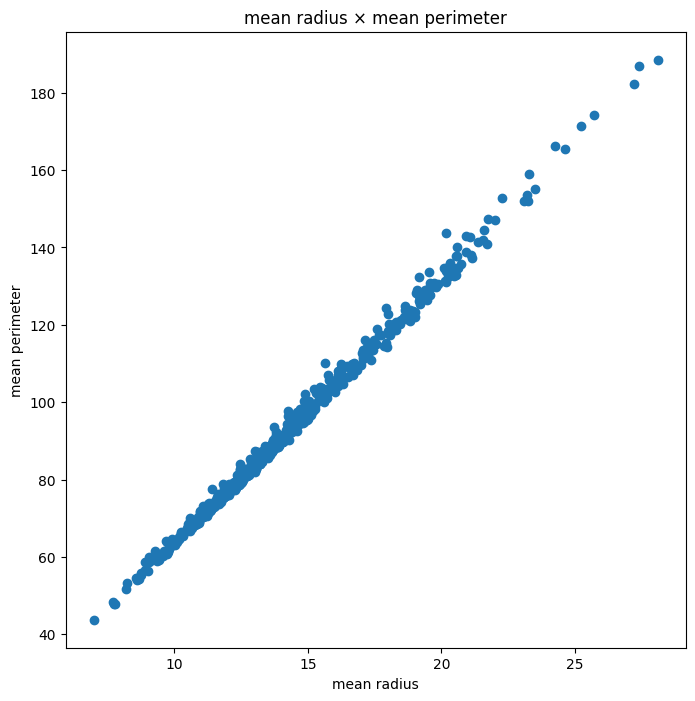

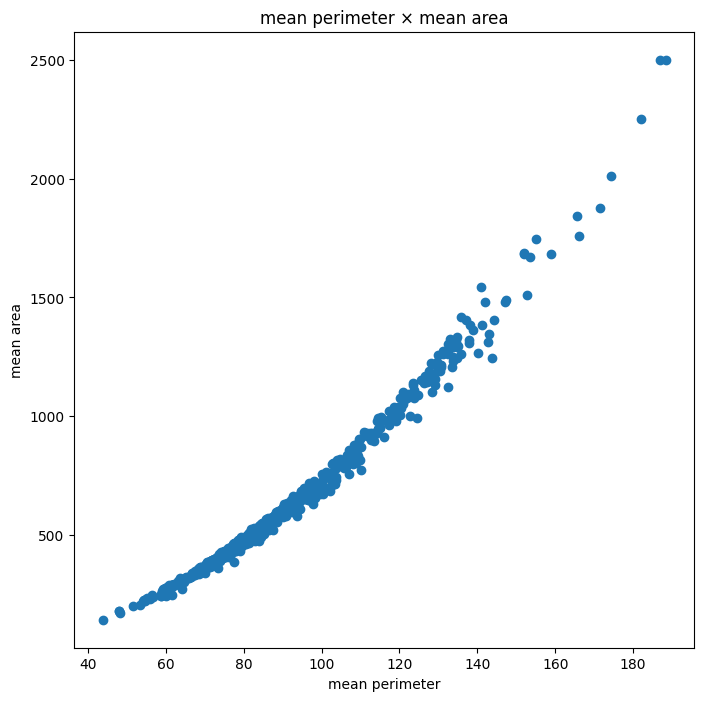

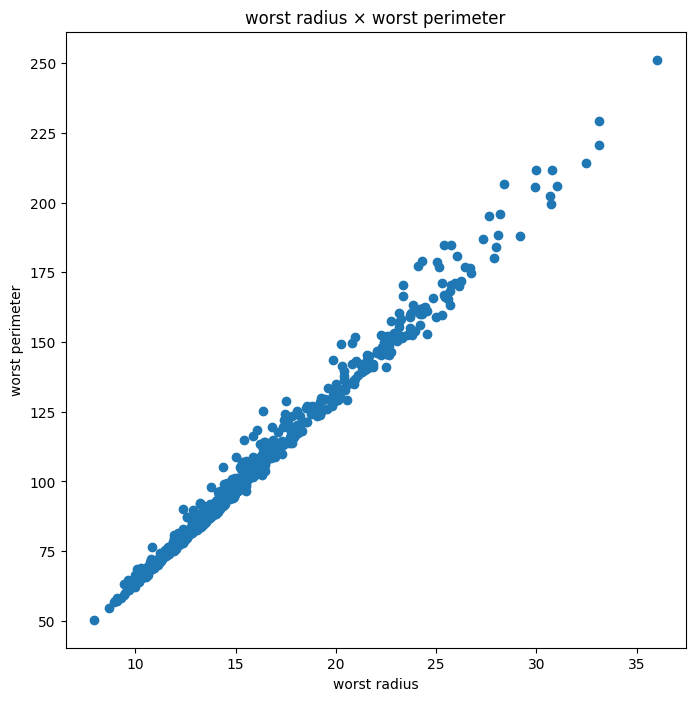

In [69]:
plot_feature_pairs_from_merged_set(df, top_merged_df)

## PCA e SVD
Si procede con il calcolo di PCA e SVD, come fatto in precedenza, ed infine si salva il risultato su disco:

In [70]:
pca_df = compute_pca(df, n = 3)
svd_df = compute_svd(df, n = 3, std = True)
pca_df.to_csv(out_file.format(name="breast_cancer_pca"))
svd_df.to_csv(out_file.format(name="breast_cancer_svd"))